In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
def poly_reg(x,y,degree,file):
    
    x_a=x[0:int((len(x)+1)/2)]
    x_a.reverse() #Setting up x-coordinates
    y_u=y[:int((len(y)+1)/2)] #setting up y upper co-ordinates for fit
    y_u.reverse()
    y_l=y[int((len(y)+1)/2)-1:] #setting up y lower co-ordinates for fit
    if(len(y_u)!=len(y_l)):
        y_l.pop(0)
    
    X=np.zeros((len(x_a),degree+1))
    for i in range(degree+1):
        X[:,i]=np.power(x_a,i) #Setting up the X matrix
    X_t=X.transpose()
    
    #Regression using Normal Equation (Least squared)
    
    theta_u=(np.linalg.pinv(X_t.dot(X))).dot(X_t.dot(y_u))
    theta_l=(np.linalg.pinv(X_t.dot(X))).dot(X_t.dot(y_l))
    print('Features of original airfoil for top and bottom surface')
    print('Top surface ',theta_u,'\n')
    print('Bottom surface ',theta_l,'\n')
    
    #Plotting Predicted Value vs Original Value
    
    y_up=X.dot(theta_u)
    y_lp=X.dot(theta_l)   
    
    fig,ax=plt.subplots(figsize=(12,6))
    
    ax.plot(x_a,y_up,'r',label='Prediction Upper Surface')
    ax.plot(x_a,y_lp,'b',label='Prediction Lower Surface')
    
    ax.scatter(x_a,y_u,label='Original Upper Surface')
    ax.scatter(x_a,y_l,label='Original Lower Surface')
    ax.legend(loc=1) #Location of legends
    ax.set_title(file)
    
    #Equation for the upper surface 
    print("The polynomial equation for the upper surface of selected degree",degree,"is",)
    print("y_upper = ",end=" ")
    for i in range(len(theta_u)-1):
        SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
        d=(len(theta_u)-1)-i
        k='x{}'.format(d).translate(SUP)
        print("(",theta_u[d],k,")","+",end=" ")
    print("(",theta_u[0],")")
    print("\n")
    
    #Equation for the lower surface
    print("The polynomial equation for the lower surface of selected degree",degree,"is",)
    print("y_lower = ",end=" ")
    for i in range(len(theta_l)-1):
        SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
        d=(len(theta_l)-1)-i
        k='x{}'.format(d).translate(SUP)
        print("(",theta_l[d],k,")","+",end=" ")
    print("(",theta_l[0],")")
    print("\n")

In [70]:
import numpy as np

#To cleanup the data file(remove texts) and obtain x and y co-ordinates

def cleanup(file):
    f=open(file,'r+')
    s=f.readlines()
    stror=len(s)
    n=len(s)
    count=0
    i=0
    while (count<n):
        coun=0
        for j in range(len(s[i])):
            if(ord(s[i][j])>58):  #Removing lines with text
                s.remove(s[i])
                coun=1
            if coun==1:
                break
        a1=len(s)
        if(stror==a1):
            i=i+1
        stror=a1
        count=count+1
    f.truncate(0)
    f.seek(0)
    f.writelines(s)
    f.close()
    
    #Obtaining x and y list from the cleaned data file
    data = np.loadtxt(file)
    x=data[:,0]
    y=data[:,1]
    x=x.tolist()
    y=y.tolist()
    #Removing any unnecessary numbers (not co-ordinates)
    for i in range(len(y)-1):
        if(x[i])>1.01:
            x.pop(i)
            y.pop(i)
            
    #Rearranging co-ordinates in the right order
    if x[0]<0.3:
        a=x[:int(len(x)/2)]
        a.reverse()
        x=a+x[int(len(x)/2):]
        b=y[:int(len(y)/2)]
        b.reverse()
        y=b+y[int(len(y)/2):]
            
    if x[int(len(x)/2)+3]>0.5:
        a=x[int(len(x)/2):]
        a.reverse()
        x=x[:int(len(x)/2)]+a
        b=y[int(len(y)/2):]
        b.reverse()
        y=y[:int(len(y)/2)]+b
    
    return(x,y)

Features of original airfoil for top and bottom surface
Top surface  [  5.71276496e-03   8.40497100e-01  -4.73009355e+00   1.35575987e+01
  -2.05730544e+01   1.54828817e+01  -4.58407065e+00] 

Bottom surface  [ -3.22452193e-03  -3.32790386e-01   1.32437168e+00  -3.74444476e+00
   6.68771509e+00  -5.89727154e+00   1.96578115e+00] 

The polynomial equation for the upper surface of selected degree 6 is
y_upper =  ( -4.58407064862 x⁶ ) + ( 15.4828816694 x⁵ ) + ( -20.573054411 x⁴ ) + ( 13.5575987126 x³ ) + ( -4.7300935519 x² ) + ( 0.840497100146 x¹ ) + ( 0.00571276496059 )


The polynomial equation for the lower surface of selected degree 6 is
y_lower =  ( 1.96578115357 x⁶ ) + ( -5.89727153939 x⁵ ) + ( 6.68771509232 x⁴ ) + ( -3.74444475779 x³ ) + ( 1.32437168379 x² ) + ( -0.33279038563 x¹ ) + ( -0.00322452192847 )




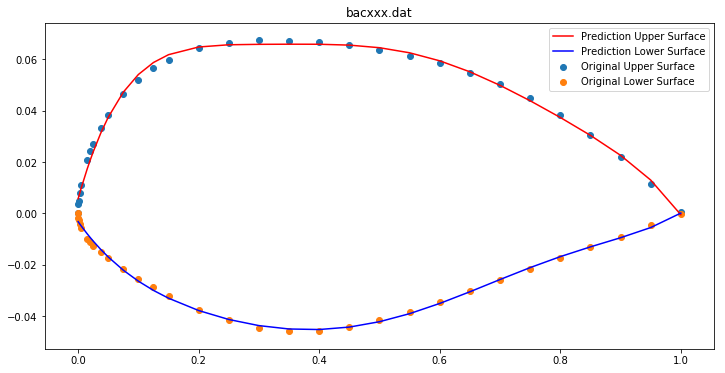

In [71]:
################################################INPUT########################################################################
#Enter data file below (ensure you are running in the directory of the file else enter the complete address)
file='bacxxx.dat'
degree=6 #Enter the degree of polynomial required
#############################################################################################################################
(x,y)=cleanup(file)
poly_reg(x,y,degree,file)

Features of original airfoil for top and bottom surface
Top surface  [  3.69464493e-03   8.03143702e-01  -6.13633730e+00   2.94004684e+01
  -8.63217215e+01   1.51887699e+02  -1.56425476e+02   8.68199985e+01
  -2.00316310e+01] 

Bottom surface  [ -2.33277870e-03  -4.04097309e-01   3.80102894e+00  -1.88691574e+01
   5.60734497e+01  -9.97092842e+01   1.03501172e+02  -5.77577783e+01
   1.33665312e+01] 

The polynomial equation for the upper surface of selected degree 8 is
y_upper =  ( -20.0316309705 x⁸ ) + ( 86.8199985176 x⁷ ) + ( -156.425475955 x⁶ ) + ( 151.8876995 x⁵ ) + ( -86.321721524 x⁴ ) + ( 29.4004683979 x³ ) + ( -6.13633730309 x² ) + ( 0.803143702069 x¹ ) + ( 0.00369464492667 )


The polynomial equation for the lower surface of selected degree 8 is
y_lower =  ( 13.3665312261 x⁸ ) + ( -57.7577782953 x⁷ ) + ( 103.501171844 x⁶ ) + ( -99.7092842218 x⁵ ) + ( 56.0734497253 x⁴ ) + ( -18.8691573567 x³ ) + ( 3.80102893847 x² ) + ( -0.404097309471 x¹ ) + ( -0.00233277869776 )




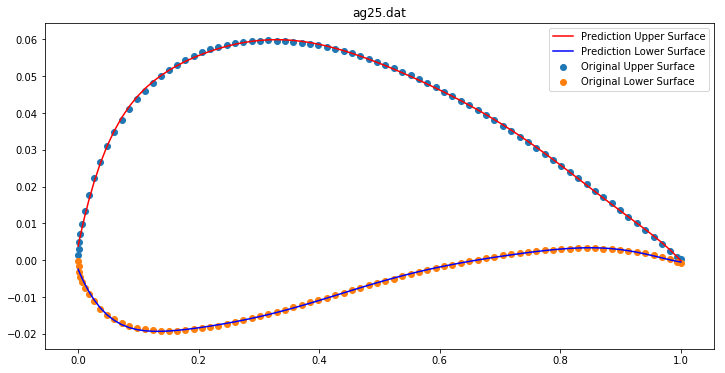

In [72]:
################################################INPUT########################################################################
#Enter data file below (ensure you are running in the directory of the file else enter the complete address)
file='ag25.dat'
degree=8 #Enter the degree of polynomial required
#############################################################################################################################
(x,y)=cleanup(file)
poly_reg(x,y,degree,file)

Features of original airfoil for top and bottom surface
Top surface  [  1.37633780e-03   1.01527684e+00  -7.25701058e+00   3.44405453e+01
  -1.02232569e+02   1.82645786e+02  -1.91086813e+02   1.07652217e+02
  -2.51791672e+01] 

Bottom surface  [ -6.75420745e-04  -3.21891817e-01   5.16296024e+00  -3.00080617e+01
   9.26655260e+01  -1.65818481e+02   1.71625929e+02  -9.51717451e+01
   2.18666658e+01] 

The polynomial equation for the upper surface of selected degree 8 is
y_upper =  ( -25.179167226 x⁸ ) + ( 107.652217388 x⁷ ) + ( -191.086813182 x⁶ ) + ( 182.645786285 x⁵ ) + ( -102.232569367 x⁴ ) + ( 34.4405453429 x³ ) + ( -7.25701057678 x² ) + ( 1.01527684482 x¹ ) + ( 0.0013763378015 )


The polynomial equation for the lower surface of selected degree 8 is
y_lower =  ( 21.8666658425 x⁸ ) + ( -95.1717450554 x⁷ ) + ( 171.625928739 x⁶ ) + ( -165.818480544 x⁵ ) + ( 92.665526039 x⁴ ) + ( -30.0080617471 x³ ) + ( 5.16296023678 x² ) + ( -0.321891816759 x¹ ) + ( -0.000675420745296 )




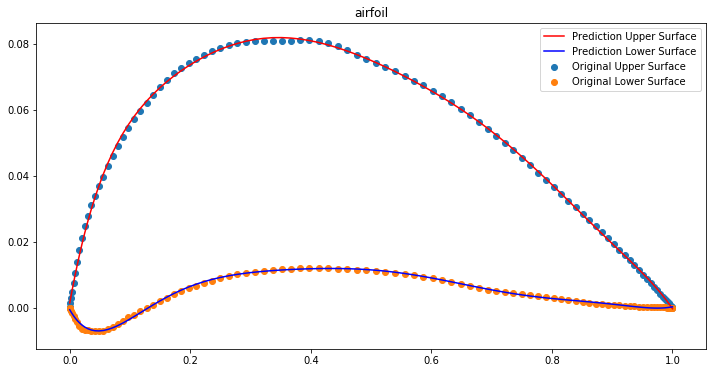

In [73]:
#Co-ordinates can also be inputted directly as a list. Paste the co-ordinate in the right order in the x and y below.
#The co-ordinates must start from the top surface, going from trailing edge to leading edge on the top surface 
#and then the bottom surface, going from leading edge to trailing edge on the bottom surface

#This block can be deleted if unnecesary

##################################################INPUT#################################################################################

x=[1.0, 0.9997482711915926, 0.9989933382359422, 0.9977359612865423, 0.9959774064153977, 0.9937194443381971, 0.9909643486313533, 0.9877148934427036, 0.9839743506981782, 0.9797464868072487, 0.9750355588704727, 0.9698463103929542, 0.9641839665080363, 0.9580542287160347, 0.9514632691433106, 0.9444177243274617, 0.9369246885348925, 0.9289917066174886, 0.9206267664155906, 0.9118382907149164, 0.9026351287655294, 0.8930265473713936, 0.883022221559489, 0.8726322248378774, 0.8618670190525352, 0.8507374438531606, 0.8392547057785661, 0.8274303669726426, 0.8152763335422613, 0.8028048435688333, 0.7900284547855991, 0.7769600319330552, 0.7636127338052514, 0.7499999999999998, 0.7361355373863416, 0.722033306302887, 0.7077075065009432, 0.6931725628465644, 0.678443110795936, 0.6635339816587109, 0.6484601876641376, 0.6332369068450178, 0.6178794677547135, 0.6024033340325953, 0.5868240888334652, 0.5711574191366426, 0.5554190999505056, 0.5396249784283944, 0.5237909579118714, 0.5079329819174038, 0.49206701808259595, 0.4762090420881288, 0.4603750215716058, 0.4445809000494946, 0.4288425808633576, 0.413175911166535, 0.3975966659674045, 0.3821205322452867, 0.36676309315498246, 0.3515398123358625, 0.3364660183412892, 0.32155688920406417, 0.30682743715343586, 0.29229249349905695, 0.2779666936971132, 0.2638644626136586, 0.24999999999999994, 0.2363872661947488, 0.22303996806694493, 0.20997154521440103, 0.19719515643116647, 0.18472366645773897, 0.1725696330273574, 0.1607452942214342, 0.14926255614683936, 0.13813298094746496, 0.12736777516212272, 0.1169777784405111, 0.10697345262860641, 0.09736487123447063, 0.08816170928508382, 0.0793732335844094, 0.07100829338251152, 0.06307531146510759, 0.05558227567253832, 0.04853673085668947, 0.041945771283965094, 0.03581603349196383, 0.030153689607045786, 0.02496444112952728, 0.020253513192751316, 0.016025649301821876, 0.012285106557296532, 0.009035651368646591, 0.006280555661802856, 0.00402259358460233, 0.0022640387134577056, 0.0010066617640577813, 0.0002517288084074587, 0.0, 0.0002517288084074587, 0.0010066617640577813, 0.0022640387134577056, 0.00402259358460233, 0.006280555661802856, 0.009035651368646647, 0.012285106557296477, 0.016025649301821876, 0.020253513192751316, 0.02496444112952728, 0.030153689607045786, 0.03581603349196372, 0.041945771283965205, 0.048536730856689414, 0.05558227567253826, 0.06307531146510753, 0.07100829338251147, 0.0793732335844094, 0.0881617092850836, 0.09736487123447068, 0.10697345262860625, 0.116977778440511, 0.12736777516212267, 0.1381329809474649, 0.14926255614683936, 0.1607452942214339, 0.1725696330273575, 0.18472366645773874, 0.1971951564311667, 0.20997154521440092, 0.22303996806694487, 0.2363872661947488, 0.25000000000000006, 0.26386446261365865, 0.277966693697113, 0.2922924934990568, 0.30682743715343574, 0.32155688920406406, 0.3364660183412892, 0.3515398123358625, 0.3667630931549825, 0.38212053224528636, 0.39759666596740467, 0.4131759111665348, 0.42884258086335747, 0.44458090004949447, 0.46037502157160576, 0.4762090420881289, 0.492067018082596, 0.507932981917404, 0.5237909579118711, 0.5396249784283943, 0.5554190999505055, 0.5711574191366426, 0.5868240888334652, 0.6024033340325954, 0.6178794677547136, 0.6332369068450175, 0.6484601876641374, 0.6635339816587108, 0.6784431107959359, 0.6931725628465644, 0.7077075065009432, 0.7220333063028871, 0.7361355373863413, 0.7500000000000001, 0.7636127338052512, 0.7769600319330552, 0.790028454785599, 0.8028048435688334, 0.8152763335422613, 0.8274303669726425, 0.839254705778566, 0.8507374438531607, 0.861867019052535, 0.8726322248378773, 0.883022221559489, 0.8930265473713938, 0.9026351287655293, 0.9118382907149163, 0.9206267664155907, 0.9289917066174885, 0.9369246885348925, 0.9444177243274616, 0.9514632691433107, 0.9580542287160347, 0.9641839665080363, 0.9698463103929542, 0.9750355588704727, 0.9797464868072487, 0.9839743506981782, 0.9877148934427036, 0.9909643486313533, 0.9937194443381971, 0.9959774064153977, 0.9977359612865423, 0.9989933382359422, 0.9997482711915926, 1.0]
y=[0.0, 5.285566269176127e-05, 0.0002112807721556353, 0.0004748497085795317, 0.0008428531638938596, 0.001314298246199711, 0.0018879086597426366, 0.0025621249936702457, 0.0033351051615488564, 0.004204725041792274, 0.005168579376663519, 0.006223982994239688, 0.007367972423587537, 0.008597307978290857, 0.00990847638732571, 0.011297694055025384, 0.012760911033460111, 0.01429381579093313, 0.015891840859433064, 0.017550169441765812, 0.01926374305571398, 0.021025587836373018, 0.022827383852399102, 0.024667231078653346, 0.026544379633329385, 0.028459002700169468, 0.03041224961715263, 0.03240628901827671, 0.03444434129322475, 0.03653069972819975, 0.03867713622190468, 0.040890311272464536, 0.04314953844744904, 0.0454307851904272, 0.04770747919819198, 0.04995062446871946, 0.05212894647959979, 0.05422200458980384, 0.056289087505760615, 0.058326331602870096, 0.060312927970223536, 0.06222720343250094, 0.06404677978207594, 0.06574874435776695, 0.06733656659011569, 0.06884779353996281, 0.07028434752224856, 0.07164777516607931, 0.07294001414266761, 0.07416335829537993, 0.07535206814057557, 0.07665045975312329, 0.07796950047176697, 0.07918417783022212, 0.08017175624977341, 0.0808129915600766, 0.08099984475887367, 0.08099150327137214, 0.0809709643803278, 0.080938962648193, 0.0808962551078284, 0.08084361606551173, 0.08078183203359628, 0.08066451062179886, 0.08026622829116117, 0.07960753870781292, 0.07874443815987935, 0.0777292794608261, 0.07661049713116933, 0.07543238251282952, 0.07422518051906392, 0.07276673076532329, 0.07099993647823723, 0.06898659433768368, 0.06678356751088449, 0.06444272916926146, 0.06201096046640838, 0.059530200511619044, 0.057037545393664055, 0.05455027284999896, 0.051847137867316845, 0.04892674131675036, 0.04588267845246716, 0.042794680289498316, 0.03972959618845292, 0.03674410890680754, 0.03386586027699557, 0.030954531941542303, 0.027900434055642943, 0.02466614833903764, 0.021166499657253153, 0.017493425465167516, 0.013870596717824007, 0.0104705309653014, 0.007423476537133375, 0.004825396244636954, 0.0027449317724667238, 0.001229245981446625, 0.0003086574943663747, 0.0, -0.00010126395020463422, -0.000404428123821848, -0.0009065244591487514, -0.0015990047328519367, -0.0024623918205736455, -0.0034588977631837222, -0.0045231135894392115, -0.0055509039168787, -0.006386666013144064, -0.006809137964073822, -0.006921130523061464, -0.007016452901871668, -0.007085925017635244, -0.007118850920465495, -0.007017164356258696, -0.006600572559121767, -0.005901421653343525, -0.004989999025883705, -0.003971945196644714, -0.0029919135273903667, -0.002128429981889787, -0.0012030521906572647, -0.00021508207483229646, 0.000819060234478269, 0.0018789936608751162, 0.002940228701797893, 0.003974060016503241, 0.004947501773015182, 0.005823268050935094, 0.006612199528041126, 0.00739965455209794, 0.008169001868999942, 0.008897280092592594, 0.009559308590354589, 0.010127803468437162, 0.010573520033098414, 0.01088398948044143, 0.011161748091580066, 0.011418763771880482, 0.011643411917596744, 0.011823500662639177, 0.01194636770863253, 0.011998984394151873, 0.011981327253273466, 0.011915409615857908, 0.011809637104299303, 0.011672449737074066, 0.01151259855934517, 0.011339058831562807, 0.011150414966836495, 0.010894412166012524, 0.010574254956066311, 0.010203998847886692, 0.009797700971037559, 0.0093692858394808, 0.008930807754435728, 0.00841794807003788, 0.007823360897157343, 0.0071899539874273844, 0.006558683276170592, 0.005968201469718647, 0.005454535103539696, 0.00503965196442856, 0.004678911507101154, 0.004354046392841358, 0.0040546874999999975, 0.0037713367200191694, 0.003495419202807243, 0.003219324445318846, 0.0029360307899962738, 0.0026340393843271304, 0.00232138813358538, 0.0020114642113759663, 0.0017157394937043335, 0.0014437926354880415, 0.0012033507507573714, 0.001000349644664431, 0.0008390113750661576, 0.0007203616631678518, 0.0006174413839908072, 0.0005212398538559514, 0.00043298133122046553, 0.00035347637584145174, 0.00028316306966898435, 0.00022215028156940148, 0.00017026234746442043, 0.00012708453353308936, 9.200865287309699e-05, 6.427821538781014e-05, 4.303250652525955e-05, 2.7349012651597633e-05, 1.6283639040908128e-05, 8.908200394230385e-06, 4.344703096967484e-06, 1.795982668061289e-06, 5.723085816585531e-07, 1.1362134503988492e-07, 7.122849936126014e-09, 0.0]
degree=8 #Enter the degree of polynomial required
file='airfoil'
#########################################################################################################################################
poly_reg(x,y,degree,file)